In [4]:
from gensim import corpora
from gensim.models import LdaModel
from gensim import models
from gensim.corpora import Dictionary
import pandas as pd
import matplotlib.pyplot as plt
from gensim.models import CoherenceModel
from pyLDAvis import gensim
import pyLDAvis
import numpy as np

In [6]:
def map2list(x):
    return x.split()

In [7]:
dataFrame = pd.read_csv('./ENdata/reddit_1.csv')
dataFrame

,time,text
0,2023-10-20 23:51:08,imagine flag
1,2023-10-20 23:47:45,didnt murder way music festival civilian call ...
2,2023-10-20 23:44:30,palestinian fan hamas
3,2023-10-20 23:43:12,palestine
4,2023-10-20 23:40:41,flag peace
...,...,...
7289,2023-10-07 03:35:06,idk one maybehttps youtu.belhwqviwi siphxlwehl...
7290,2023-10-07 02:35:17,link
7291,2023-10-07 01:32:50,preach
7292,2023-10-07 01:06:40,terrifying people death holy men reality sort ...


In [8]:
texts = dataFrame['text'].map(map2list).values
dictionary = Dictionary(texts)

In [9]:
# 压缩词向量，去掉出现的文章小于2的词，和在50%的文章都出现的词，整体长度限制在1000
dictionary.filter_extremes(no_below=2, no_above=0.5, keep_n=1000)
corpus = [dictionary.doc2bow(text) for text in texts]

In [10]:
# 进行TF/IDF编码
tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

In [11]:
dictionary.token2id

{'flag': 0,
 'imagine': 1,
 'call': 2,
 'cease': 3,
 'civilian': 4,
 'didnt': 5,
 'festival': 6,
 'fire': 7,
 'murder': 8,
 'music': 9,
 'way': 10,
 'fan': 11,
 'hamas': 12,
 'palestinian': 13,
 'palestine': 14,
 'peace': 15,
 'scale': 16,
 'effort': 17,
 'extremist': 18,
 'intention': 19,
 'part': 20,
 'god': 21,
 'israel': 22,
 'jew': 23,
 'b': 24,
 'form': 25,
 'gt': 26,
 'messiah': 27,
 'question': 28,
 'insurrection': 29,
 'jail': 30,
 'year': 31,
 'air': 32,
 'show': 33,
 'group': 34,
 'loser': 35,
 'word': 36,
 'doesnt': 37,
 'im': 38,
 'plane': 39,
 'time': 40,
 'east': 41,
 'europe': 42,
 'http': 43,
 'liar': 44,
 'anything': 45,
 'bunch': 46,
 'nonsense': 47,
 'heart': 48,
 'stuff': 49,
 'aljazeera': 50,
 'evidence': 51,
 'footage': 52,
 'jazeera': 53,
 'news': 54,
 'office': 55,
 'reddit': 56,
 'second': 57,
 'strike': 58,
 'today': 59,
 'week': 60,
 'yeah': 61,
 'history': 62,
 'building': 63,
 'case': 64,
 'die': 65,
 'hospital': 66,
 'jihadist': 67,
 'parking': 68,
 'peop

In [12]:
list(corpus_tfidf)[:10]

[[(0, 0.6750854214947837), (1, 0.7377395703669488)],
 [(2, 0.3729415470624535),
  (3, 0.4089761255650226),
  (4, 0.21666172592325766),
  (5, 0.3495782678606481),
  (6, 0.35835296050236926),
  (7, 0.3053262878526632),
  (8, 0.34181453303203707),
  (9, 0.3729415470624535),
  (10, 0.21666172592325766)],
 [(11, 0.8469058251727104),
  (12, 0.30843622359896444),
  (13, 0.43314849562308333)],
 [(14, 1.0)],
 [(0, 0.7962296702504928), (15, 0.6049944728778862)],
 [(16, 1.0)],
 [(13, 0.18060741765420046),
  (17, 0.38370836831955385),
  (18, 0.3374238089633695),
  (19, 0.8018590855646118),
  (20, 0.25162676489587316)],
 [(21, 0.706436583618104), (22, 0.4023731200057258), (23, 0.5822741842318268)],
 [(24, 1.0)],
 [(22, 0.21458025806340159),
  (25, 0.5323358561029606),
  (26, 0.4150773106251249),
  (27, 0.5674648648353562),
  (28, 0.4198431880335518)]]

In [10]:
# 训练LDA
for num_topics in range(1, 30):
    print(f'开始训练第{num_topics}个主题')
    # 训练LDA模型,passes为迭代次数
    lda = LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=num_topics, passes=50)
    print(f'训练第{num_topics}个主题完毕')
    lda.save(f'./ENmodel/{num_topics}.model')
    print(f'第{num_topics}个主题保存完毕')
    # 打印主题
    for topic in lda.print_topics(num_words=10, num_topics=num_topics):
        print(topic)

开始训练第1个主题
训练第1个主题完毕
第1个主题保存完毕
(0, '0.016*"people" + 0.014*"hamas" + 0.012*"israel" + 0.008*"war" + 0.008*"time" + 0.007*"video" + 0.007*"http" + 0.007*"thing" + 0.007*"palestinian" + 0.006*"palestine"')
开始训练第2个主题
训练第2个主题完毕
第2个主题保存完毕
(0, '0.016*"war" + 0.015*"time" + 0.015*"http" + 0.013*"palestine" + 0.011*"palestinian" + 0.011*"jew" + 0.010*"world" + 0.010*"country" + 0.010*"god" + 0.010*"people"')
(1, '0.028*"hamas" + 0.023*"people" + 0.019*"israel" + 0.014*"video" + 0.012*"way" + 0.012*"civilian" + 0.011*"thing" + 0.011*"gaza" + 0.011*"child" + 0.011*"rocket"')
开始训练第3个主题
训练第3个主题完毕
第3个主题保存完毕
(0, '0.024*"people" + 0.020*"way" + 0.016*"shit" + 0.015*"god" + 0.015*"time" + 0.012*"thats" + 0.012*"lol" + 0.011*"money" + 0.010*"everyone" + 0.010*"kid"')
(1, '0.028*"video" + 0.021*"thing" + 0.021*"jew" + 0.020*"guy" + 0.012*"man" + 0.012*"plane" + 0.011*"someone" + 0.011*"im" + 0.011*"person" + 0.011*"lot"')
(2, '0.033*"hamas" + 0.029*"israel" + 0.016*"people" + 0.015*"palestinian" + 0.015*

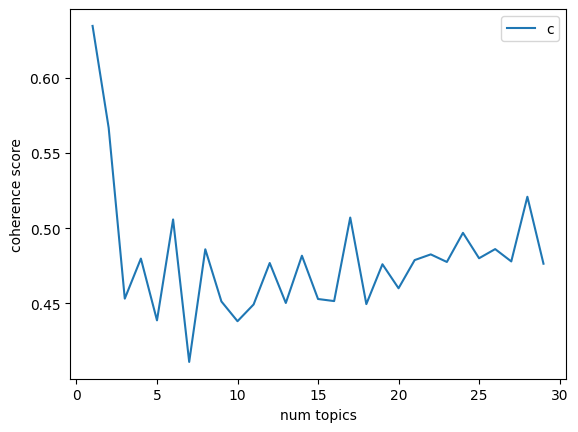

In [11]:
# 主题一致性
x_list = []
y_list = []
for i in range(1, 30):
    model_name = f'./ENmodel/{i}.model'
    lda = models.ldamodel.LdaModel.load(model_name)
    cv_tmp = CoherenceModel(model=lda, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence = cv_tmp.get_coherence()
    x_list.append(i)
    y_list.append(coherence)
    # print(i, coherence)
plt.plot(x_list, y_list)
plt.xlabel('num topics')
plt.ylabel('coherence score')
plt.legend(('coherence_values'), loc='best')
plt.savefig('./ENdata/主题一致性.png')
plt.show()

In [12]:
import math
import gensim


def perplexity(ldamodel: gensim.models.LdaModel, data, dictionary: gensim.corpora.Dictionary):
    """
    计算LDA模型困惑度

    :param ldamodel:  lda模型
    :param data: 计算困惑度需要训练数据
    :param dictionary: 文本处理后的Dictionary，使用corpora.Dictionary(my_data)处理训练gensim模型时的数据 my_data 后得到的
    :return: 返回困惑度
    """
    size_dictionary = len(dictionary.keys())
    testset = []
    for i in data:
        testset.append(dictionary.doc2bow(i))
    num_topics = ldamodel.num_topics
    prob_doc_sum = 0.0
    topic_word_list = []  # store the probablity of topic-word:[(u'business', 0.010020942661849608),(u'family', 0.0088027946271537413)...]
    for topic_id in range(num_topics):
        topic_word = ldamodel.show_topic(topic_id, size_dictionary)
        dic = {}
        for word, probability in topic_word:
            dic[word] = probability
        topic_word_list.append(dic)
    doc_topics_ist = []  # store the doc-topic tuples:[(0, 0.0006211180124223594),(1, 0.0006211180124223594),...]
    for doc in testset:
        doc_topics_ist.append(ldamodel.get_document_topics(doc, minimum_probability=0))
    testset_word_num = 0
    for i in range(len(testset)):
        prob_doc = 0.0  # the probablity of the doc
        doc = testset[i]
        doc_word_num = 0  # the num of words in the doc
        for word_id, num in doc:
            prob_word = 0.0  # the probablity of the word
            doc_word_num += num
            word = dictionary[word_id]
            for topic_id in range(num_topics):
                # cal p(w) : p(w) = sumz(p(z)*p(w|z))
                prob_topic = doc_topics_ist[i][topic_id][1]
                prob_topic_word = topic_word_list[topic_id][word]
                prob_word += prob_topic * prob_topic_word
            prob_doc += math.log(prob_word)  # p(d) = sum(log(p(w)))
        prob_doc_sum += prob_doc
        testset_word_num += doc_word_num
    prep = math.exp(-prob_doc_sum / testset_word_num)  # perplexity = exp(-sum(p(d)/sum(Nd))
    # print("LDA模型困惑度 : %s" % prep)
    return prep


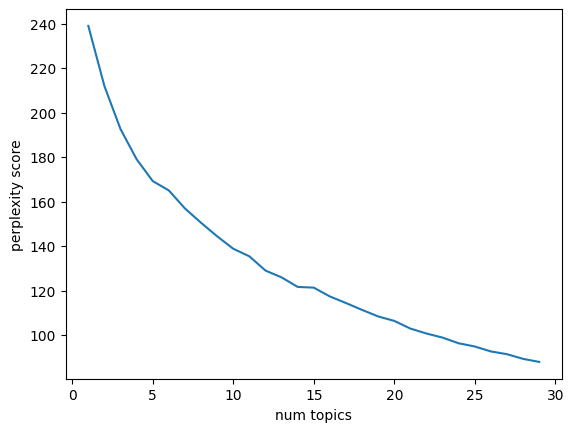

In [19]:
# 绘制困惑度-主题数目曲线
x = []
y = []
for i in range(1, 30):
    model_name = f'./ENmodel/{i}.model'
    lda = models.ldamodel.LdaModel.load(model_name)
    perp = perplexity(lda, texts, dictionary)
    x.append(i)
    y.append(perp)
    # print(perp)
plt.xlabel('num topics')
plt.ylabel('perplexity score')
# plt.legend(('perplexity_values'), loc='best')
plt.plot(x,y)
plt.savefig('./ENdata/困惑度.png')
plt.show()

In [16]:
import pyLDAvis.gensim as gensimvis
from gensim import models
for i in range(2, 30):
    model_name = f'./ENmodel/{i}.model'
    lda = models.ldamodel.LdaModel.load(model_name)
    vis_data = gensimvis.prepare(lda, corpus, dictionary)
    # pyLDAvis.show(vis_data, open_browser=False)
    pyLDAvis.save_html(vis_data, f'./ENLDAView/lda_pass{i}.html')

In [27]:
lda = models.ldamodel.LdaModel.load('./ENmodel/5.model')
lda.print_topics(num_words=10)  

[(0,
  '0.035*"guy" + 0.027*"someone" + 0.026*"god" + 0.024*"shit" + 0.023*"money" + 0.022*"way" + 0.019*"person" + 0.018*"youre" + 0.014*"comment" + 0.013*"question"'),
 (1,
  '0.026*"people" + 0.018*"child" + 0.017*"woman" + 0.015*"fuck" + 0.015*"thing" + 0.015*"year" + 0.011*"post" + 0.010*"yeah" + 0.010*"iran" + 0.010*"kid"'),
 (2,
  '0.029*"hamas" + 0.028*"israel" + 0.022*"palestine" + 0.021*"palestinian" + 0.019*"people" + 0.018*"war" + 0.016*"jew" + 0.016*"land" + 0.014*"side" + 0.014*"civilian"'),
 (3,
  '0.051*"http" + 0.022*"video" + 0.019*"lot" + 0.018*"time" + 0.016*"reddit" + 0.015*"source" + 0.013*"something" + 0.013*"thanks" + 0.011*"b" + 0.011*"place"'),
 (4,
  '0.034*"rocket" + 0.031*"hospital" + 0.023*"lol" + 0.019*"plane" + 0.018*"im" + 0.016*"idf" + 0.015*"hamas" + 0.013*"life" + 0.013*"thank" + 0.013*"thats"')]

In [16]:
from gensim import models
lda = models.ldamodel.LdaModel.load('./ENmodel/batch1/14.model')
lda.print_topics(num_words=10)  

[(0,
  '0.047*"time" + 0.047*"video" + 0.039*"post" + 0.037*"person" + 0.032*"reddit" + 0.031*"life" + 0.022*"wow" + 0.020*"human" + 0.018*"piece" + 0.018*"foot"'),
 (1,
  '0.092*"fuck" + 0.031*"everything" + 0.028*"lmao" + 0.025*"earth" + 0.023*"bank" + 0.022*"west" + 0.021*"jihad" + 0.021*"scum" + 0.020*"ww" + 0.018*"shot"'),
 (2,
  '0.037*"thing" + 0.026*"death" + 0.025*"gt" + 0.022*"people" + 0.022*"world" + 0.021*"government" + 0.020*"hate" + 0.019*"bro" + 0.019*"war" + 0.018*"violence"'),
 (3,
  '0.052*"people" + 0.045*"plane" + 0.038*"something" + 0.034*"money" + 0.031*"terrorist" + 0.030*"way" + 0.029*"anything" + 0.028*"one" + 0.023*"b" + 0.023*"reason"'),
 (4,
  '0.042*"side" + 0.036*"youre" + 0.035*"thank" + 0.032*"point" + 0.031*"news" + 0.028*"house" + 0.024*"right" + 0.021*"player" + 0.021*"didnt" + 0.020*"bunch"'),
 (5,
  '0.086*"god" + 0.040*"guess" + 0.036*"war" + 0.036*"crime" + 0.031*"fact" + 0.030*"propaganda" + 0.029*"sound" + 0.026*"look" + 0.026*"whats" + 0.022*"

In [17]:
predict_matrix = np.zeros([len(corpus_tfidf), 14])
for i in range(len(corpus_tfidf)):
    row = lda[corpus_tfidf[i]]
    for j, t in row:
        predict_matrix[i][j] = t
np.save('./ENdata/topic14/doc_topic_1.npy', predict_matrix)